MNIST via Fully Connected Deep Neural Network with 4 Hidden Layers. All of the misclassified examples in the test set are displayed.

In [0]:
import tensorflow as tf

In [0]:
tf.reset_default_graph()

In [0]:
#Input layer (x), hidden layers, output layer
n_inputs = 28*28 # = 784
n_hidden1 = 400
n_hidden2 = 200
n_hidden3 = 100
n_hidden4 = 50
n_outputs = 10

In [0]:
x = tf.placeholder(tf.float32, shape = (None, n_inputs), name = "x") #784-dimensional tensor that can be injected with data, images
y = tf.placeholder(tf.int64, shape = (None), name = "y") #batch_size vector of class ids

In [0]:
with tf.name_scope("layers"): #label for this part of the graph, the layers of the neural network
    hidden1 = tf.layers.dense(x, n_hidden1, name = "hidden1", activation = tf.nn.relu)
    #Creates densely connected layer of a neural network which outputs activation(input + bias)
    #Takes x (which will be fed) as input and has n_hidden1 units
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name = "hidden2", activation = tf.nn.relu)
    hidden3 = tf.layers.dense(hidden2, n_hidden3, name = "hidden3", activation = tf.nn.relu)
    hidden4 = tf.layers.dense(hidden3, n_hidden4, name = "hidden4", activation = tf.nn.relu)
    logits = tf.layers.dense(hidden4, n_outputs, name = "outputs")
    #Output layer with 10 nodes taking inputs from the fourth hidden layer
    #Each layer returns an output tensor (array of outputs of each neuron)

In [0]:
#Loss function (cross-entropy)
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = "loss")

In [0]:
learning_rate = 0.125 #Best learning rate according to my tests

with tf.name_scope("minimize"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate) #Implements gradient descent algorithm
    train_op = optimizer.minimize(loss) #Minimizes loss by updating variables (weights and threshold)

In [0]:
with tf.name_scope("accuracy"):
    correct = tf.nn.in_top_k(logits, y, 1) 
    #Says whether the targets are in the top k (1) predictions
    #tf.nn.in_top_k(predictions, targets, k)
    #Returns a Tensor of type bool
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32)) 
    #tf.reduce_mean: Computes the mean of elements across dimensions of a tensor
    #tf.cast: Casts Tensor to a new type

In [0]:
init = tf.global_variables_initializer()
saver = tf.train.Saver() #Saves model

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data")

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz


In [0]:
n_epochs = 20
batch_size = 50

In [0]:
with tf.Session() as sess:
    final_accuracy = 0
    init.run()
    for epoch in range(n_epochs):
        for step in range(mnist.train.num_examples // batch_size): # // means integer division
            x_batch, y_batch = mnist.train.next_batch(batch_size) #Batch of images and batch of labels
            sess.run(train_op, feed_dict={x: x_batch, y: y_batch}) #Applying gradient descent to batch
        acc_train = accuracy.eval(feed_dict={x: x_batch, y: y_batch}) #Accuracy score on training set
        acc_test = accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels}) #Accuracy score on test set
        print("Epoch {:>2d}".format(epoch), "\tTrain accuracy {:.4f}".format(acc_train), 
                                                  "\tTest accuracy {:.4f}".format(acc_test))
        if acc_test > final_accuracy:
            final_accuracy = acc_test
            save_model = saver.save(sess, "models/my_model_final.ckpt") #Save the model with the highest accuracy
    print("\nFinal Accuracy {}".format(final_accuracy))

Epoch  0 	Train accuracy 1.0000 	Test accuracy 0.9638
Epoch  1 	Train accuracy 1.0000 	Test accuracy 0.9717
Epoch  2 	Train accuracy 1.0000 	Test accuracy 0.9725
Epoch  3 	Train accuracy 1.0000 	Test accuracy 0.9746
Epoch  4 	Train accuracy 1.0000 	Test accuracy 0.9792
Epoch  5 	Train accuracy 1.0000 	Test accuracy 0.9784
Epoch  6 	Train accuracy 1.0000 	Test accuracy 0.9796
Epoch  7 	Train accuracy 1.0000 	Test accuracy 0.9820
Epoch  8 	Train accuracy 1.0000 	Test accuracy 0.9797
Epoch  9 	Train accuracy 1.0000 	Test accuracy 0.9818
Epoch 10 	Train accuracy 1.0000 	Test accuracy 0.9809
Epoch 11 	Train accuracy 1.0000 	Test accuracy 0.9807
Epoch 12 	Train accuracy 1.0000 	Test accuracy 0.9819
Epoch 13 	Train accuracy 1.0000 	Test accuracy 0.9804
Epoch 14 	Train accuracy 1.0000 	Test accuracy 0.9742
Epoch 15 	Train accuracy 1.0000 	Test accuracy 0.9812
Epoch 16 	Train accuracy 1.0000 	Test accuracy 0.9837
Epoch 17 	Train accuracy 1.0000 	Test accuracy 0.9848
Epoch 18 	Train accuracy 1.0

INFO:tensorflow:Restoring parameters from models/my_model_final.ckpt
Mistake 1


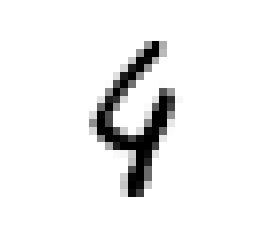

Actual Label: 4
Prediction: 9


Mistake 2


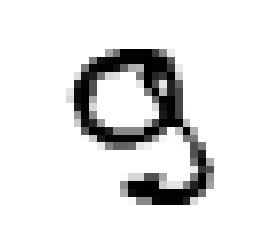

Actual Label: 9
Prediction: 8


Mistake 3


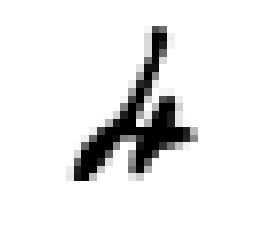

Actual Label: 4
Prediction: 6


Mistake 4


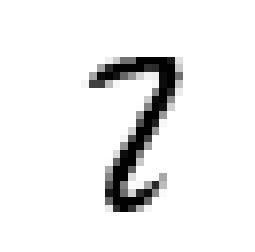

Actual Label: 2
Prediction: 7


Mistake 5


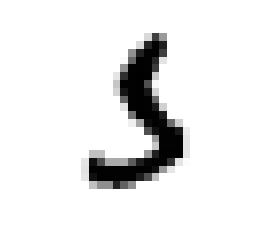

Actual Label: 5
Prediction: 3


Mistake 6


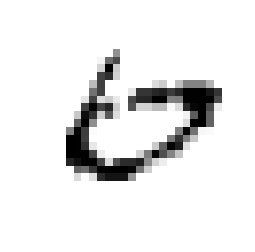

Actual Label: 6
Prediction: 0


Mistake 7


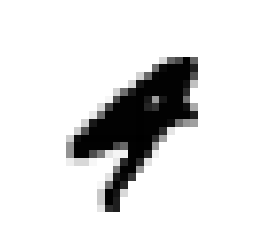

Actual Label: 4
Prediction: 9


Mistake 8


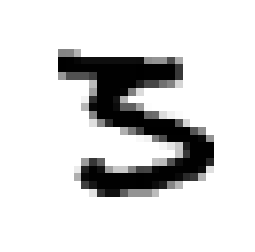

Actual Label: 3
Prediction: 5


Mistake 9


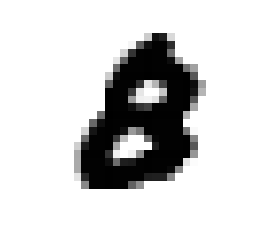

Actual Label: 8
Prediction: 0


Mistake 10


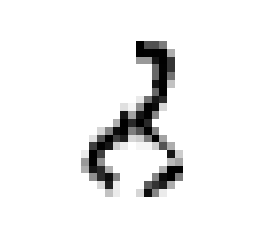

Actual Label: 8
Prediction: 2


Mistake 11


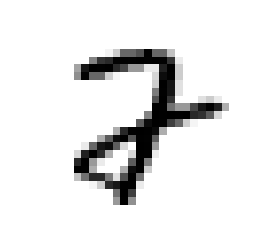

Actual Label: 2
Prediction: 7


Mistake 12


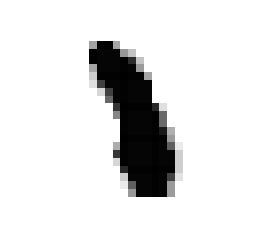

Actual Label: 1
Prediction: 8


Mistake 13


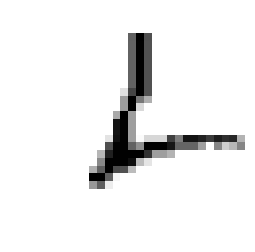

Actual Label: 2
Prediction: 6


Mistake 14


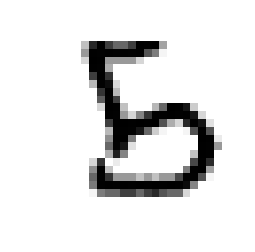

Actual Label: 5
Prediction: 8


Mistake 15


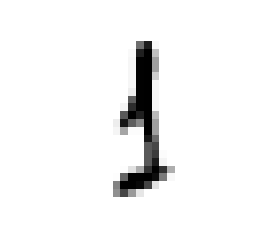

Actual Label: 1
Prediction: 3


Mistake 16


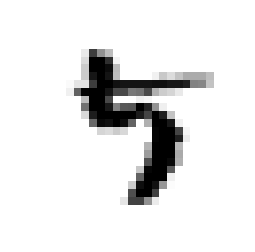

Actual Label: 5
Prediction: 4


Mistake 17


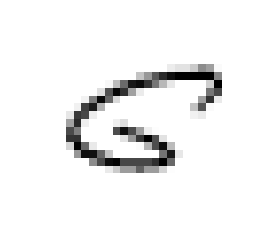

Actual Label: 6
Prediction: 5


Mistake 18


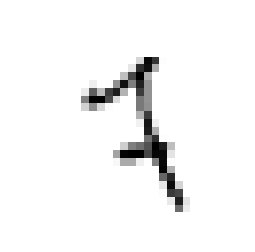

Actual Label: 7
Prediction: 2


Mistake 19


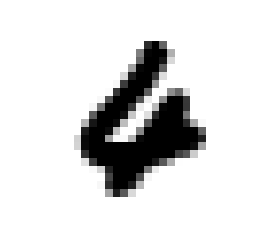

Actual Label: 4
Prediction: 6


Mistake 20


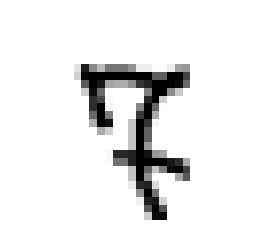

Actual Label: 7
Prediction: 8


Mistake 21


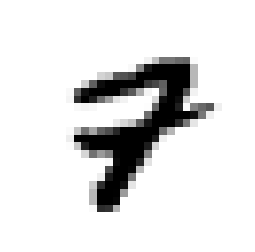

Actual Label: 7
Prediction: 9


Mistake 22


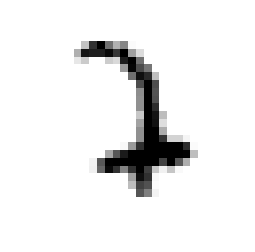

Actual Label: 7
Prediction: 2


Mistake 23


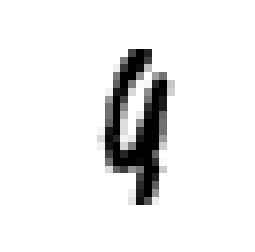

Actual Label: 9
Prediction: 4


Mistake 24


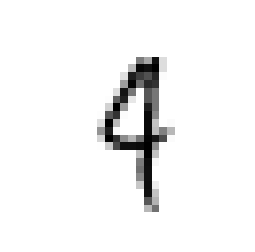

Actual Label: 4
Prediction: 9


Mistake 25


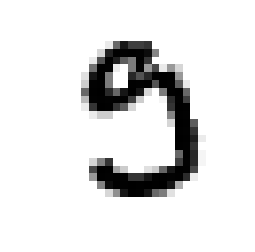

Actual Label: 9
Prediction: 3


Mistake 26


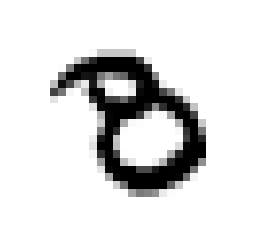

Actual Label: 8
Prediction: 3


Mistake 27


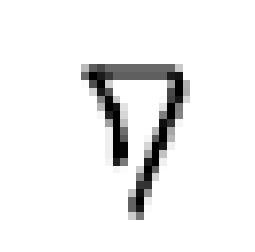

Actual Label: 7
Prediction: 8


Mistake 28


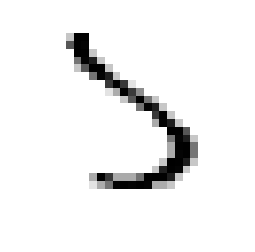

Actual Label: 5
Prediction: 3


Mistake 29


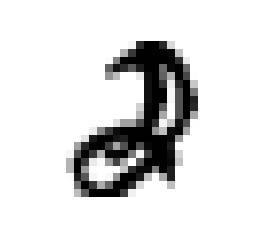

Actual Label: 2
Prediction: 3


Mistake 30


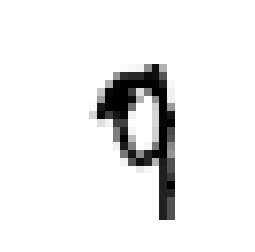

Actual Label: 9
Prediction: 7


Mistake 31


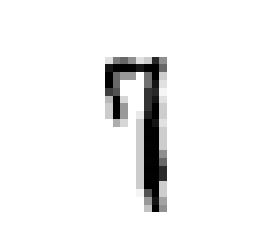

Actual Label: 7
Prediction: 9


Mistake 32


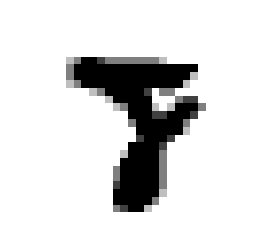

Actual Label: 8
Prediction: 7


Mistake 33


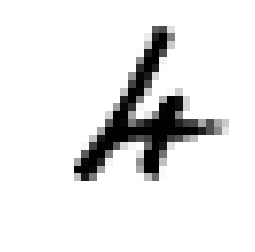

Actual Label: 4
Prediction: 6


Mistake 34


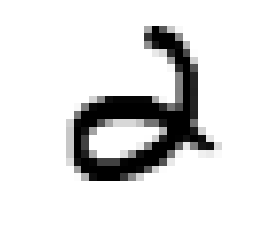

Actual Label: 2
Prediction: 6


Mistake 35


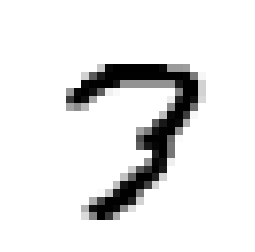

Actual Label: 3
Prediction: 7


Mistake 36


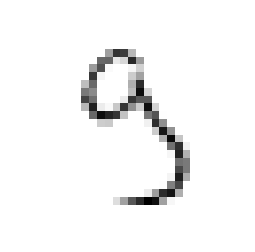

Actual Label: 9
Prediction: 5


Mistake 37


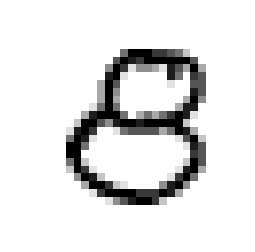

Actual Label: 8
Prediction: 2


Mistake 38


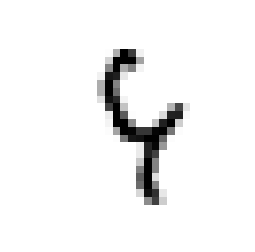

Actual Label: 9
Prediction: 4


Mistake 39


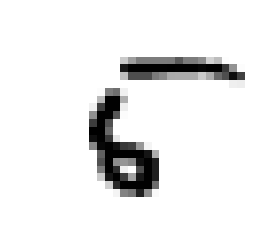

Actual Label: 5
Prediction: 6


Mistake 40


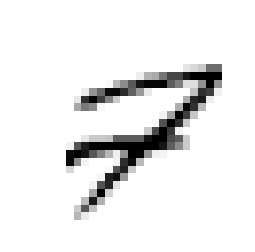

Actual Label: 7
Prediction: 2


Mistake 41


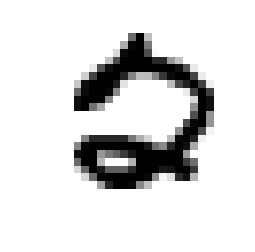

Actual Label: 2
Prediction: 0


Mistake 42


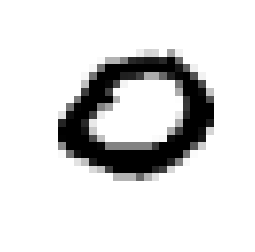

Actual Label: 0
Prediction: 9


Mistake 43


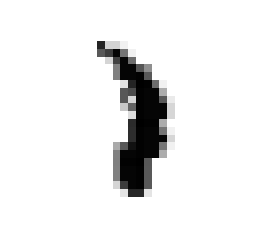

Actual Label: 1
Prediction: 2


Mistake 44


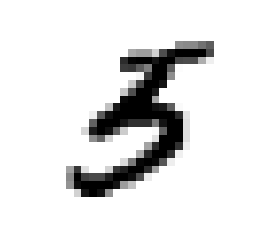

Actual Label: 5
Prediction: 3


Mistake 45


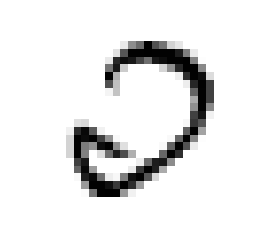

Actual Label: 2
Prediction: 0


Mistake 46


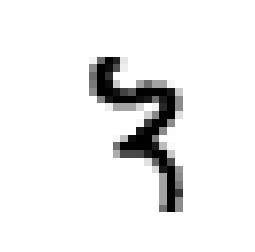

Actual Label: 3
Prediction: 7


Mistake 47


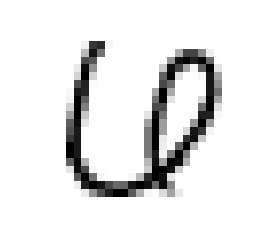

Actual Label: 6
Prediction: 4


Mistake 48


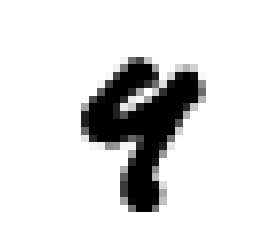

Actual Label: 4
Prediction: 9


Mistake 49


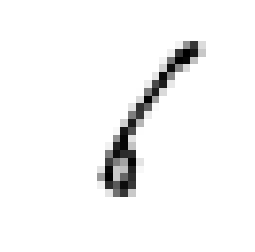

Actual Label: 6
Prediction: 1


Mistake 50


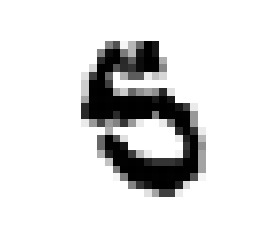

Actual Label: 5
Prediction: 8


Mistake 51


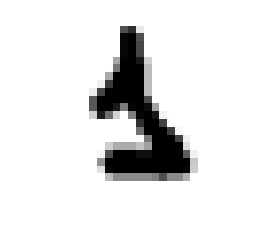

Actual Label: 1
Prediction: 6


Mistake 52


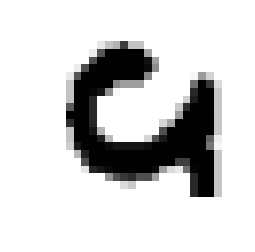

Actual Label: 9
Prediction: 6


Mistake 53


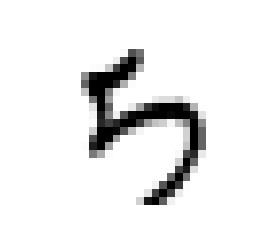

Actual Label: 5
Prediction: 9


Mistake 54


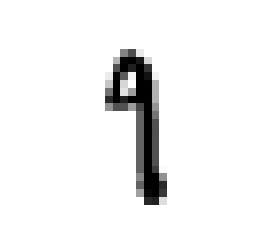

Actual Label: 9
Prediction: 1


Mistake 55


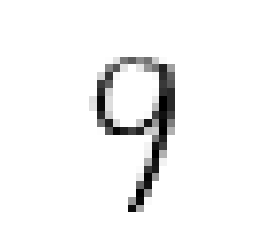

Actual Label: 9
Prediction: 4


Mistake 56


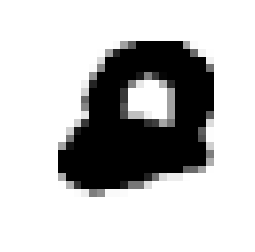

Actual Label: 2
Prediction: 0


Mistake 57


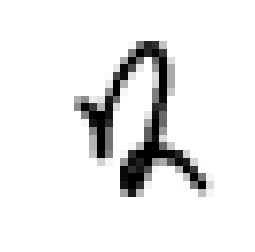

Actual Label: 2
Prediction: 4


Mistake 58


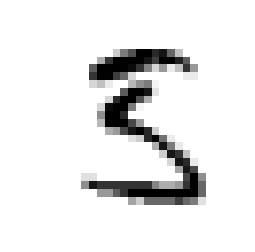

Actual Label: 5
Prediction: 3


Mistake 59


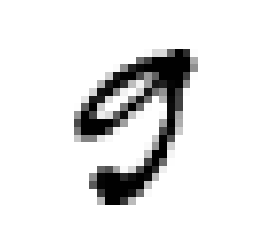

Actual Label: 9
Prediction: 0


Mistake 60


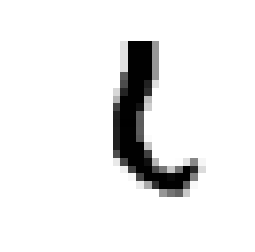

Actual Label: 6
Prediction: 1


Mistake 61


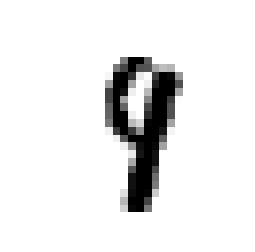

Actual Label: 9
Prediction: 4


Mistake 62


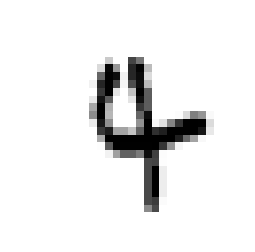

Actual Label: 4
Prediction: 7


Mistake 63


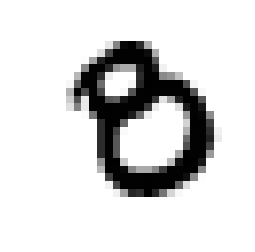

Actual Label: 8
Prediction: 0


Mistake 64


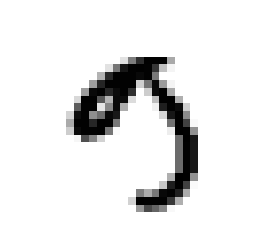

Actual Label: 9
Prediction: 5


Mistake 65


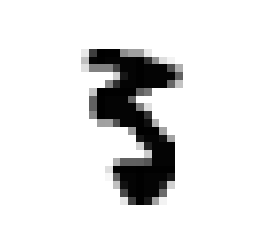

Actual Label: 3
Prediction: 5


Mistake 66


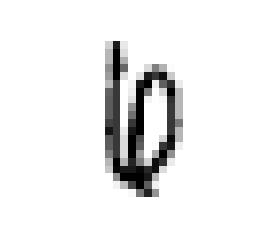

Actual Label: 6
Prediction: 8


Mistake 67


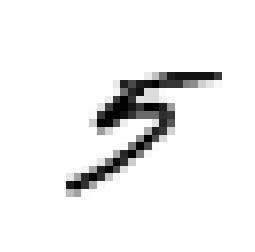

Actual Label: 5
Prediction: 4


Mistake 68


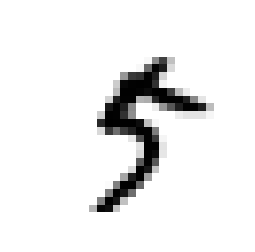

Actual Label: 5
Prediction: 9


Mistake 69


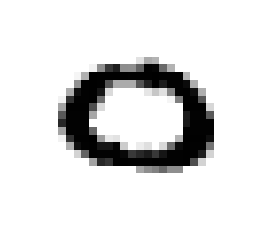

Actual Label: 0
Prediction: 9


Mistake 70


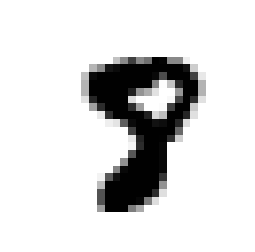

Actual Label: 8
Prediction: 9


Mistake 71


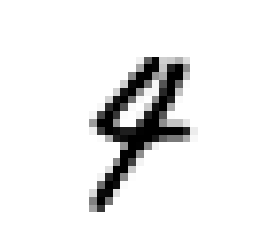

Actual Label: 4
Prediction: 9


Mistake 72


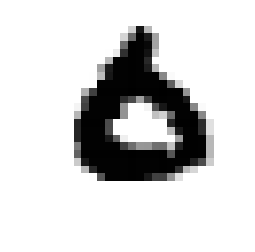

Actual Label: 6
Prediction: 0


Mistake 73


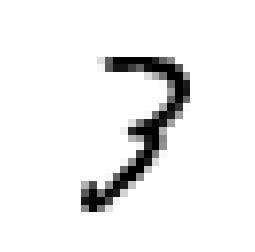

Actual Label: 3
Prediction: 7


Mistake 74


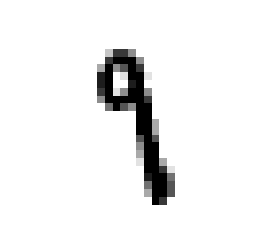

Actual Label: 9
Prediction: 1


Mistake 75


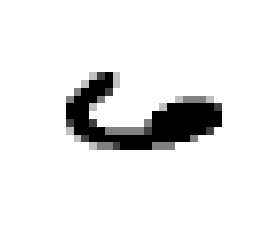

Actual Label: 6
Prediction: 4


Mistake 76


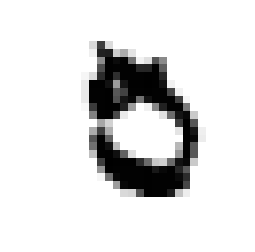

Actual Label: 5
Prediction: 0


Mistake 77


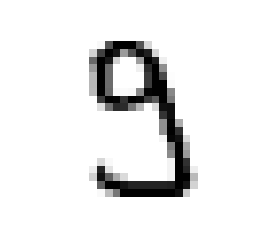

Actual Label: 9
Prediction: 3


Mistake 78


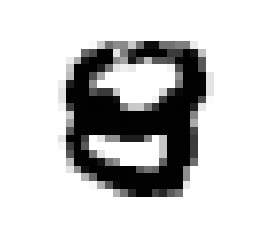

Actual Label: 8
Prediction: 4


Mistake 79


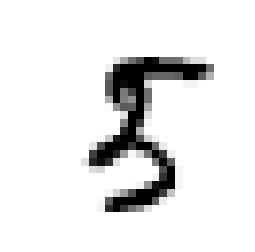

Actual Label: 5
Prediction: 8


Mistake 80


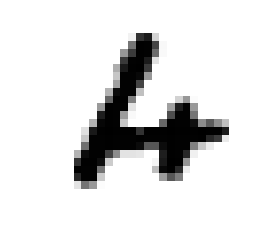

Actual Label: 4
Prediction: 6


Mistake 81


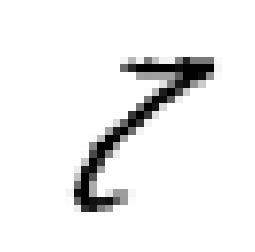

Actual Label: 7
Prediction: 8


Mistake 82


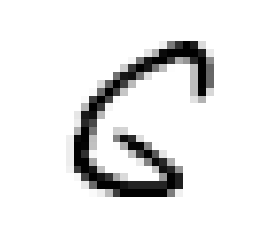

Actual Label: 6
Prediction: 5


Mistake 83


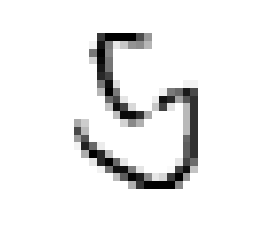

Actual Label: 5
Prediction: 6


Mistake 84


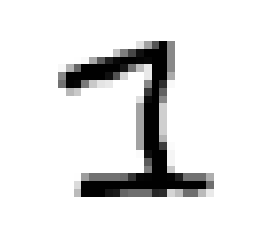

Actual Label: 1
Prediction: 3


Mistake 85


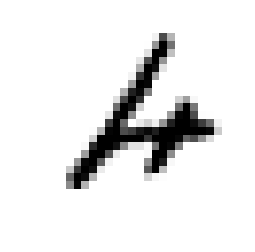

Actual Label: 4
Prediction: 6


Mistake 86


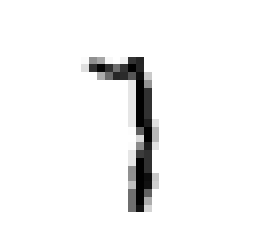

Actual Label: 7
Prediction: 1


Mistake 87


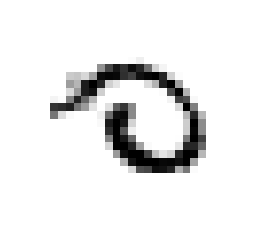

Actual Label: 0
Prediction: 3


Mistake 88


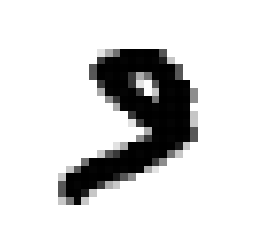

Actual Label: 9
Prediction: 3


Mistake 89


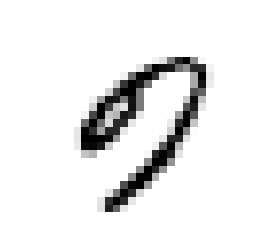

Actual Label: 9
Prediction: 0


Mistake 90


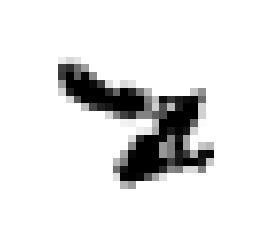

Actual Label: 2
Prediction: 7


Mistake 91


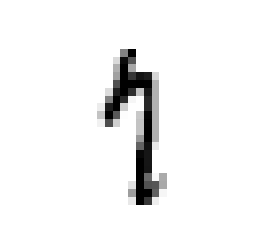

Actual Label: 1
Prediction: 7


Mistake 92


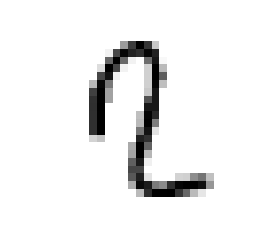

Actual Label: 2
Prediction: 8


Mistake 93


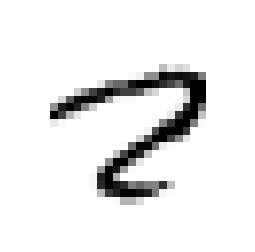

Actual Label: 2
Prediction: 8


Mistake 94


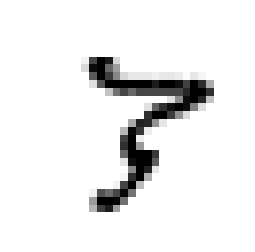

Actual Label: 3
Prediction: 7


Mistake 95


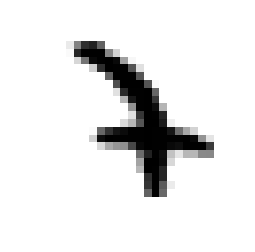

Actual Label: 7
Prediction: 2


Mistake 96


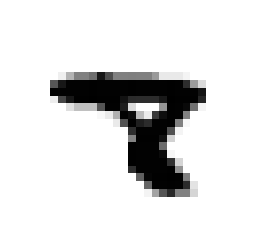

Actual Label: 8
Prediction: 7


Mistake 97


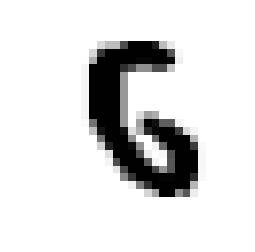

Actual Label: 6
Prediction: 5


Mistake 98


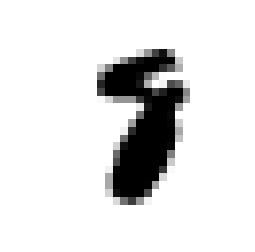

Actual Label: 8
Prediction: 7


Mistake 99


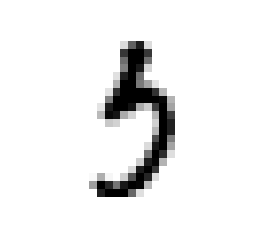

Actual Label: 3
Prediction: 5


Mistake 100


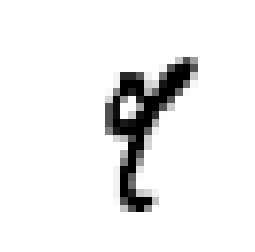

Actual Label: 9
Prediction: 4


Mistake 101


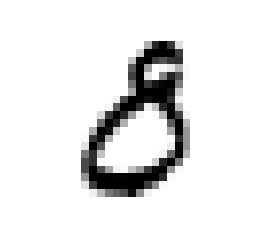

Actual Label: 8
Prediction: 0


Mistake 102


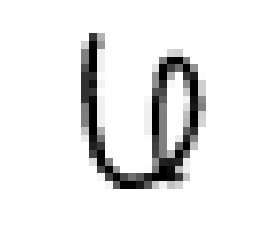

Actual Label: 6
Prediction: 4


Mistake 103


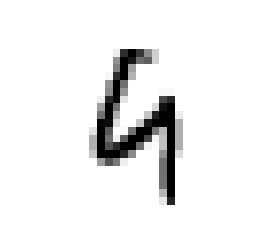

Actual Label: 9
Prediction: 4


Mistake 104


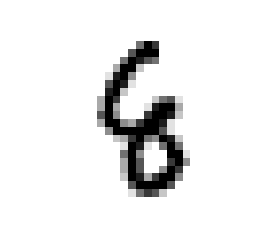

Actual Label: 8
Prediction: 6


Mistake 105


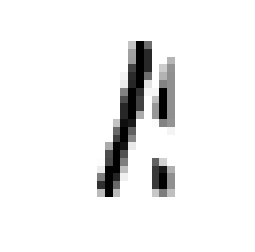

Actual Label: 1
Prediction: 8


Mistake 106


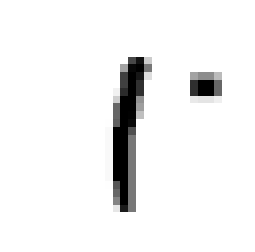

Actual Label: 1
Prediction: 8


Mistake 107


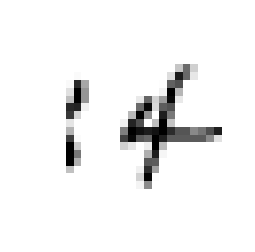

Actual Label: 4
Prediction: 3


Mistake 108


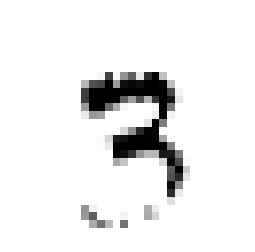

Actual Label: 3
Prediction: 2


Mistake 109


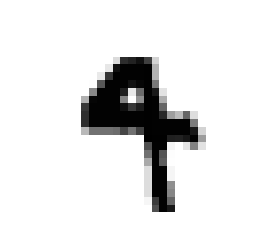

Actual Label: 4
Prediction: 9


Mistake 110


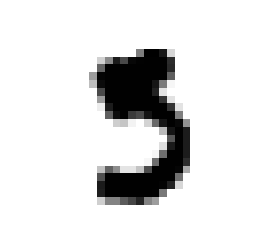

Actual Label: 5
Prediction: 3


Mistake 111


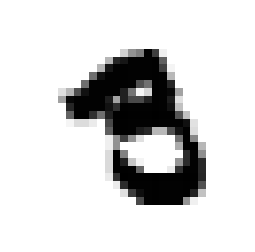

Actual Label: 3
Prediction: 8


Mistake 112


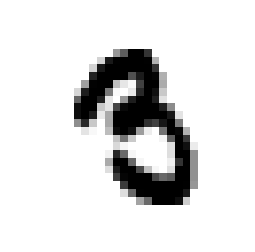

Actual Label: 3
Prediction: 8


Mistake 113


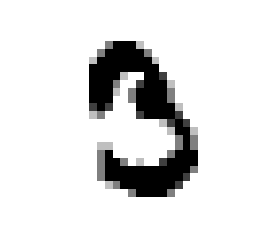

Actual Label: 3
Prediction: 5


Mistake 114


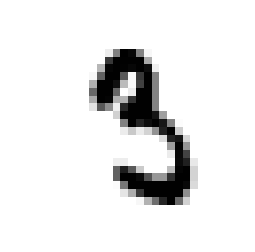

Actual Label: 3
Prediction: 9


Mistake 115


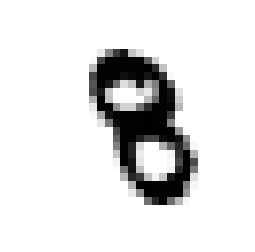

Actual Label: 8
Prediction: 3


Mistake 116


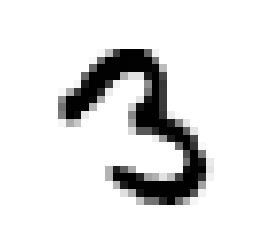

Actual Label: 3
Prediction: 9


Mistake 117


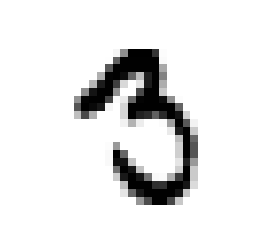

Actual Label: 3
Prediction: 9


Mistake 118


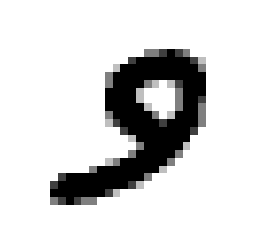

Actual Label: 9
Prediction: 3


Mistake 119


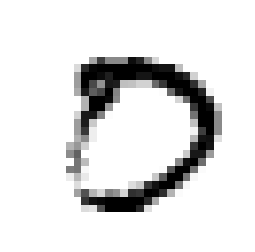

Actual Label: 0
Prediction: 5


Mistake 120


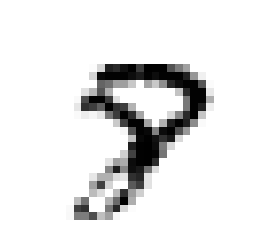

Actual Label: 8
Prediction: 9


Mistake 121


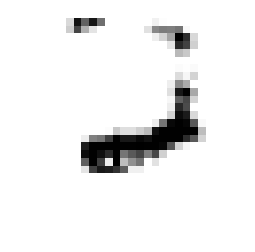

Actual Label: 2
Prediction: 6


Mistake 122


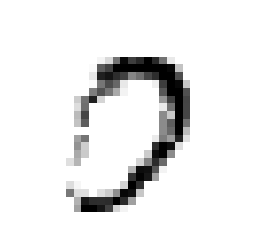

Actual Label: 0
Prediction: 7


Mistake 123


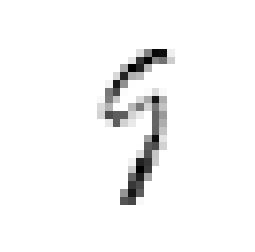

Actual Label: 9
Prediction: 5


Mistake 124


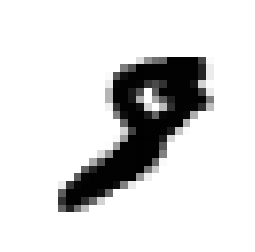

Actual Label: 8
Prediction: 9


Mistake 125


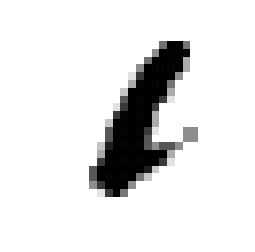

Actual Label: 1
Prediction: 6


Mistake 126


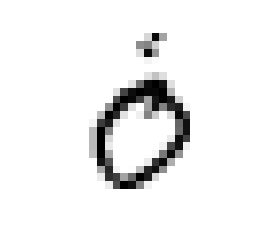

Actual Label: 0
Prediction: 6


Mistake 127


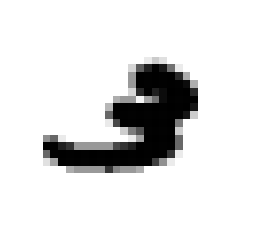

Actual Label: 3
Prediction: 2


Mistake 128


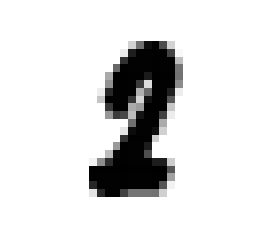

Actual Label: 2
Prediction: 8


Mistake 129


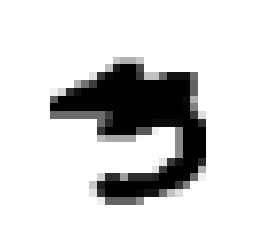

Actual Label: 3
Prediction: 9


Mistake 130


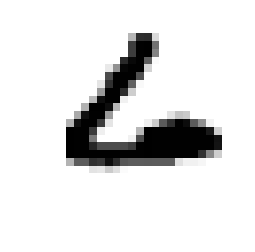

Actual Label: 6
Prediction: 4


Mistake 131


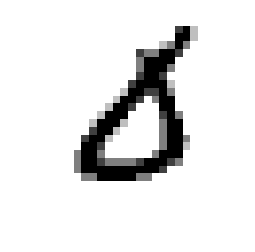

Actual Label: 0
Prediction: 6


Mistake 132


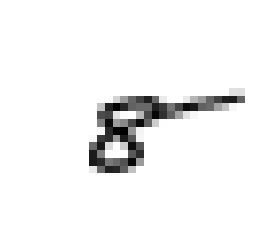

Actual Label: 8
Prediction: 6


Mistake 133


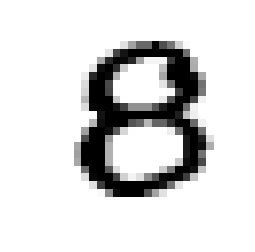

Actual Label: 8
Prediction: 0


Mistake 134


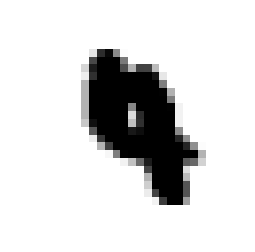

Actual Label: 4
Prediction: 9


Mistake 135


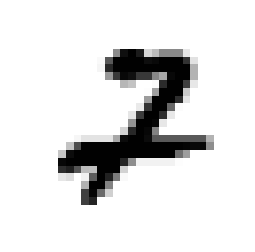

Actual Label: 7
Prediction: 2


Mistake 136


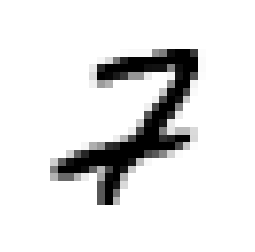

Actual Label: 7
Prediction: 2


Mistake 137


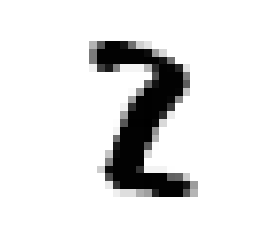

Actual Label: 2
Prediction: 3


Mistake 138


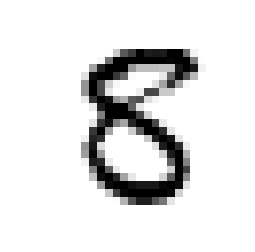

Actual Label: 8
Prediction: 5


Mistake 139


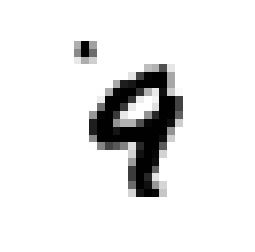

Actual Label: 9
Prediction: 4


Mistake 140


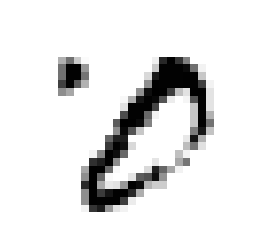

Actual Label: 0
Prediction: 8


Mistake 141


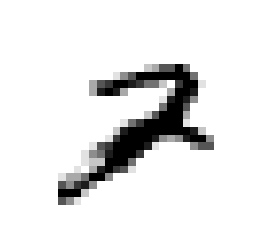

Actual Label: 2
Prediction: 7


Mistake 142


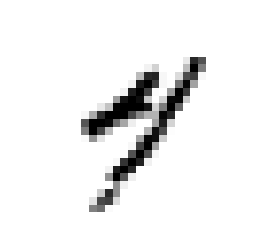

Actual Label: 4
Prediction: 7


Mistake 143


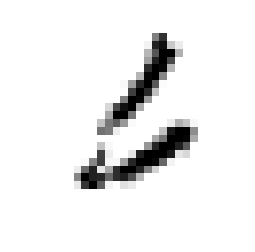

Actual Label: 6
Prediction: 3


Mistake 144


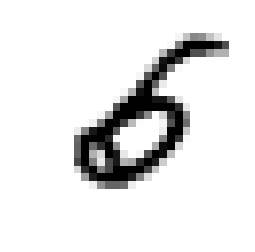

Actual Label: 5
Prediction: 6


Mistake 145


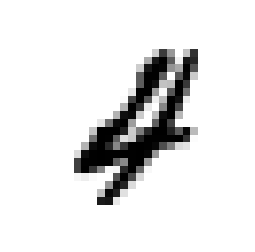

Actual Label: 4
Prediction: 0


Mistake 146


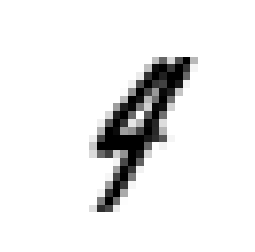

Actual Label: 4
Prediction: 9


Mistake 147


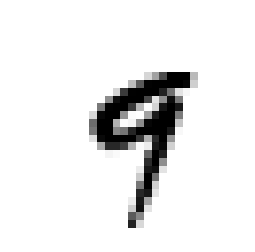

Actual Label: 9
Prediction: 4


Mistake 148


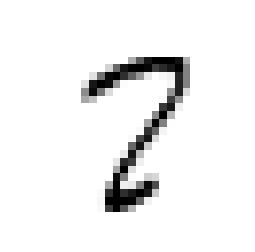

Actual Label: 2
Prediction: 7


Mistake 149


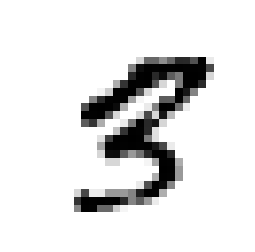

Actual Label: 3
Prediction: 8




In [0]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random

with tf.Session() as sess:
    counter = 0
    saver.restore(sess, "models/my_model_final.ckpt")
    for i in range(10000):
        digit = mnist.test.images[i].reshape(1,784)
        pred = tf.argmax(logits, 1)
        prediction = pred.eval(feed_dict = {x: digit})
        if prediction[0] != mnist.test.labels[i]:
            counter += 1
            print("Mistake " + str(counter))
            digit_image = digit.reshape(28,28)
            plt.imshow(digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
            plt.axis("off")
            plt.show()
            print("Actual Label: " + str(mnist.test.labels[i]))
            print("Prediction: " + str(prediction[0]))
            print("\n")